1. Importing the Libraries

In [ ]:
!pip install seaborn
!pip install scikit-learn

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import os
import random

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

In [ ]:
#master = pd.read_csv(r'C:\Users\Dell\Desktop\ir_image_data_grayscale_2k.csv')
#master.head()

In [ ]:
#master.shape

2. Split to Train and Test Data Set Ratio - 80%-20% ( For CSV Data File ). The Data is now being loaded from the directories generated in the format for loading the Data through the Image Data Generator.

In [ ]:
#Y = master.iloc[:,-1:]

In [ ]:
#print(Y.shape)
#Y = Y.rename(columns = {'label':'Label'})
#Y.head()

In [ ]:
#X = master.iloc[: , :-1]

In [ ]:
#print(X.shape)
#X.head()

In [ ]:
#X.pop(X.columns[0])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.40)

In [ ]:
#print("The shape of Training Data is as : ", X_train.shape)
#print("The shape of Testing Data is as : ", X_test.shape)
#print("The shape of Training Labels is as : ", y_train.shape)
#print("The shape of Testing Labels is as : ", y_test.shape)

3. If the Data is loaded from a CSV File, there is a need to reshape the Data to train the model on a CNN. If the Data is loaded from Image Data Generator, the data is loaded in the specified shape.

In [ ]:
#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

In [ ]:
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()

In [ ]:
# Reshape the Data to match the input of the CNN - Deep CNN Baseline.
#X_train = X_train.reshape(-1, 224, 224)
#X_test = X_test.reshape(-1, 224, 224)

In [ ]:
#print("The reshaped Training Data is as: ", X_train.shape)
#print("The reshaped Testing Data is as: ",X_test.shape)

In [ ]:
#print('Plot-1 - Balanced Dataset')
#sns.set_theme(style="whitegrid")
#g = sns.countplot(x=Y['Label'])
#g.set_xticklabels(g.get_xticklabels(), rotation=0);
# For the case of Image Dataset - Label:0 - Not Depressed and Label:1 - Depressed 

4. Visualising five random images from the Training Data.

In [ ]:
#y_train.shape

In [ ]:
#print('Plot -2 : Visualise the Image in Training Data')
#random.seed(10)
#fig = plt.figure()
#fig.set_figheight(15)
#fig.set_figwidth(15)
#for i in range(5):
  #ic = random.randrange(300)
  #plt.subplot(1,5,i+1)
  #plt.imshow(X_train[ic,:,:].astype('uint8'))
  #plt.xticks([])
  #plt.yticks([])
  #if y_train[ic]==0:
    #plt.title('Not Depressed')
  #elif y_train[ic]==1:
    #plt.title('Depressed')
  #plt.title(y_train[i].astype(int))

5. Using Tensorflow for loading the data through Image Data Generator and implementing Convolutional Neural Network for Training.

In [175]:
import tensorflow as tf

In [176]:
print(tf.__version__)

2.10.0


In [177]:
from keras import backend as K


In [178]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dropout,Activation
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [179]:
from tensorflow.keras.applications import ResNet50

In [180]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [181]:
Train_Datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

Valid_Datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)

Test_Datagen  = ImageDataGenerator(rescale = 1./255)

In [182]:
Train_Data_Itr = Train_Datagen.flow_from_directory(directory = r'C:\Users\Dell\Desktop\DER_Data\train',
                                                   target_size = (128,128),
                                                   class_mode = 'binary',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 1583 images belonging to 2 classes.


In [183]:
Valid_Data_Itr = Valid_Datagen.flow_from_directory(directory = r'C:\Users\Dell\Desktop\DER_Data\train',
                                                  target_size = (128,128),
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 395 images belonging to 2 classes.


In [184]:
Test_Data_Itr = Test_Datagen.flow_from_directory(directory = r'C:\Users\Dell\Desktop\DER_Data\test',
                                                  target_size = (128,128),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 495 images belonging to 2 classes.


In [186]:
# Define the Datasets, corresponding to the given iterators used to fit the model with the given models and validate the result.
train_Dataset = Train_Data_Itr
valid_Dataset = Valid_Data_Itr
test_Dataset = Test_Data_Itr 

6. Visualizing the Data Distribution and Samples

In [209]:
# Get the labels through the Train_Data_Iterator to know the key values being used by the given iterator.
Train_Labels = Train_Data_Itr.class_indices.keys()

In [195]:
print(Train_Labels)

dict_keys(['depression', 'not_depressed'])


In [187]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [251]:
# Get all the Labels for each training examples in the Train Dataset
train_labels = Train_Data_Itr.classes
test_labels = Test_Data_Itr.classes
val_labels = Valid_Data_Itr.classes

In [252]:
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(1583,)
(495,)
(395,)


In [253]:
print(train_labels)
print(test_labels)
print(val_labels)

[0 0 0 ... 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

In [254]:
train_df = pd.DataFrame(train_labels, columns = ['Label'])
test_df = pd.DataFrame(test_labels, columns = ['Label'])
val_df = pd.DataFrame(val_labels, columns = ['Label'])

<Axes: xlabel='Label', ylabel='count'>

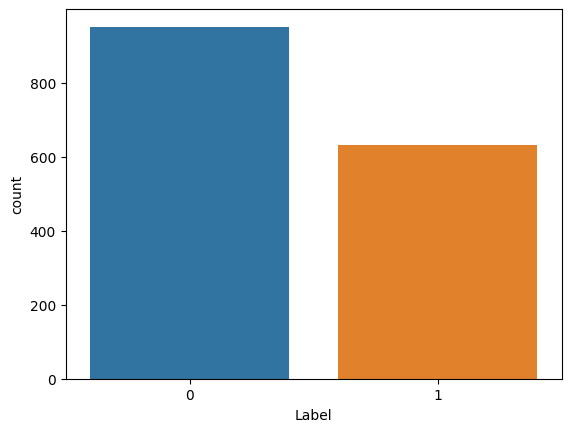

In [255]:
sns.countplot(x=train_df['Label'],data=train_df)

<Axes: xlabel='Label', ylabel='count'>

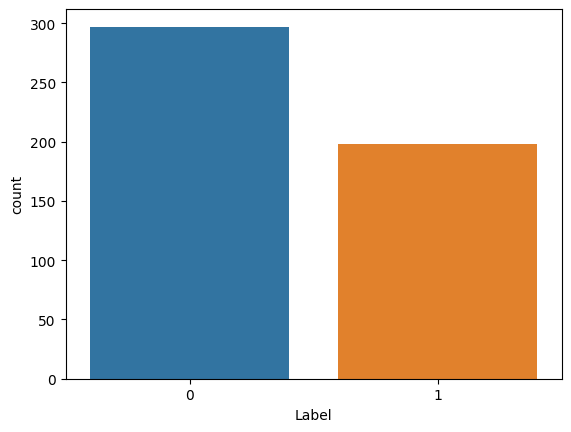

In [256]:
sns.countplot(x=test_df['Label'],data=test_df)

<Axes: xlabel='Label', ylabel='count'>

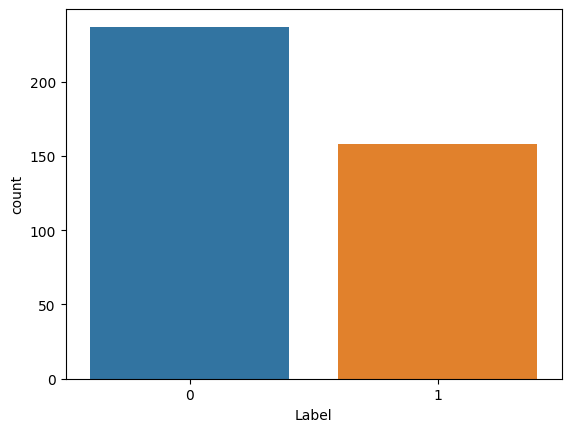

In [257]:
sns.countplot(x=val_df['Label'],data=val_df)

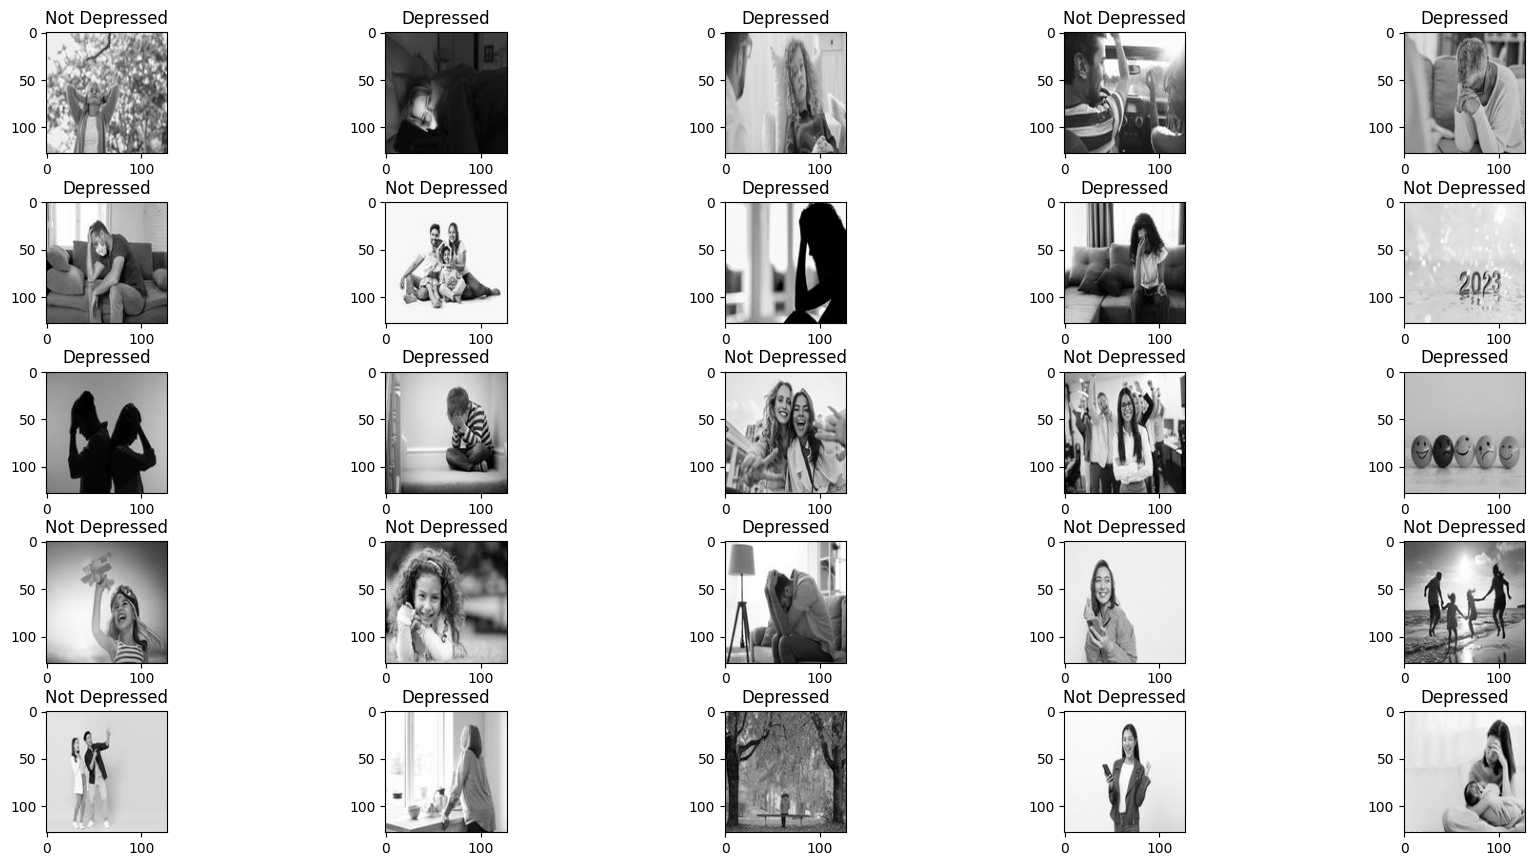

In [237]:
rows = 5
columns = 5
# Get the Plot for 5 Rows and 5 Columns
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        # Get the next image in the batch ( Get the cth Image - As the batch size is 64, hence here we consider only a single batch.)
        data_batch = Train_Data_Itr.next()
        # Get the image ----- Convert to numpy array to view the image.
        image = data_batch[0][c]
        img = np.array(image)
        # Get the Label
        #label = label_batch[0]
        # Plot the Image
        axes[r,c].imshow(img)
        if data_batch[1][c]==1.0:
            txt = 'Not Depressed'
        else:
            txt = 'Depressed'
        axes[r,c].title.set_text(txt)
        # Set the title for the image
# Set the Size of the Figure.
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.set_size_inches(20,10)

7. Defining the Evaluation Metrics as Accuracy, Loss, Precision, Recall and F-1 Score and Set the Hyper-Parameters.

In [62]:
# Define the F-1 Score as Evaluation Metric
# Reference - 
def get_f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [63]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        get_f1_score
]

In [64]:
# Reduce learning rate when a metric has stopped improving.
# Often waits for patience no. of Epochs before reducing the Learning Rate.
# Recue the Learning Rate by 'factor'/.
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=10)

In [165]:
tf.keras.optimizers.SGD(learning_rate=0.0001, name="SGD")

8. Defining the Model Architectures.

### MODEL-1 ( General Deep Convolutional Neural Network )

In [171]:
# Defining the Basic Model-1 as Deep CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

### Model - 2 ( ResNet50, Pre-Trained on ImageNet - Use Transfer Learning )

In [124]:
# Use ResNet
base_model = tf.keras.applications.ResNet50(input_shape=(128,128,3),include_top=False)

In [125]:
# Freezing Layers
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [126]:
modelRes=Sequential()
modelRes.add(base_model)
modelRes.add(Dropout(0.5))
modelRes.add(Flatten())
modelRes.add(BatchNormalization())
modelRes.add(Dense(32,kernel_initializer='he_uniform'))
modelRes.add(BatchNormalization())
modelRes.add(Activation('relu'))
modelRes.add(Dense(1,activation='sigmoid'))

In [ ]:
modelRes.summary()

### Model - 3 ( VGG19, Pre-Trained on ImageNet - Use Transfer Learning )

In [161]:
vgg19 = tf.keras.applications.VGG19(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

In [162]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [163]:
modelVGG=Sequential()
modelVGG.add(vgg19)
modelVGG.add(Dropout(0.5))
modelVGG.add(Flatten())
modelVGG.add(BatchNormalization())
modelVGG.add(Dense(32,kernel_initializer='he_uniform'))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation('relu'))
modelVGG.add(Dense(1,activation='sigmoid'))

In [164]:
print(modelVGG.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 dropout_13 (Dropout)        (None, 4, 4, 512)         0         
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_10 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 32)                262176    
                                                                 
 batch_normalization_11 (Bat  (None, 32)               128       
 chNormalization)                                     

9. Compiling the Models.

In [172]:
model.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [130]:
modelRes.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [166]:
modelVGG.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [48]:
#X_train = X_train.astype('float')
#X_test = X_test.astype('float')

In [49]:
#X_train = X_train/255
#X_test = X_test/255

In [23]:
# Vectorize the Labels
# Our vectorized labels
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
#print("The shape of Training Data is as : ", X_train.shape)
#print("The shape of Testing Data is as : ", X_test.shape)
#print("The shape of Training Labels is as : ", y_train.shape)
#print("The shape of Testing Labels is as : ", y_test.shape)

Reshape to suit the size of ResNet for GrayScale Images as Input ( Only when the Data is loaded from CSV)

In [ ]:
#X_train_new = np.repeat(X_train[..., np.newaxis], 3, -1)
#X_test_new = np.repeat(X_test[..., np.newaxis], 3, -1)

In [ ]:
#print(X_train_new.shape)
#print(X_test_new.shape)

10. Training the Models ( Fit the Models ) 

In [132]:
tf.config.run_functions_eagerly(False)

In [157]:
!pip install pydot


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
!pip install graphviz


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [159]:
from keras.utils.vis_utils import plot_model
plot_model(modelRes, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [173]:
history = model.fit(train_dataset,validation_data=valid_dataset,epochs = 50,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 6s 79ms/step - loss: 0.6856 - accuracy: 0.4914 - precision: 0.4376 - recall: 0.9595 - auc: 0.5321 - get_f1_score: 0.5654 - val_loss: 0.6802 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5597 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 3s 58ms/step - loss: 0.6805 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5663 - val_loss: 0.6768 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5682 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 3s 57ms/step - loss: 0.6667 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5681 - val_loss: 0.6632 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5668 - lr: 0.0100
Epoch 4/50
50/50 [============================

Epoch 27/50
50/50 [==============================] - 3s 57ms/step - loss: 0.5392 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5634 - val_loss: 0.5587 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5602 - lr: 0.0100
Epoch 28/50
50/50 [==============================] - 3s 57ms/step - loss: 0.5329 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5649 - val_loss: 0.5547 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5565 - lr: 0.0100
Epoch 29/50
50/50 [==============================] - 3s 58ms/step - loss: 0.5279 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5664 - val_loss: 0.5541 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5709 - lr: 0.0100
Epoch 30/50
50/50 [========================

In [133]:
history=modelRes.fit(train_dataset,validation_data=valid_dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 7s 90ms/step - loss: 0.6511 - accuracy: 0.6643 - precision: 0.6075 - recall: 0.4506 - auc: 0.6900 - get_f1_score: 0.4819 - val_loss: 0.6796 - val_accuracy: 0.5975 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6381 - val_get_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 4s 82ms/step - loss: 0.5503 - accuracy: 0.7214 - precision: 0.6812 - recall: 0.5680 - auc: 0.7799 - get_f1_score: 0.6146 - val_loss: 0.7123 - val_accuracy: 0.6000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6648 - val_get_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 3s 65ms/step - loss: 0.5293 - accuracy: 0.7366 - precision: 0.6980 - recall: 0.5997 - auc: 0.7989 - get_f1_score: 0.6345 - val_loss: 0.6962 - val_accuracy: 0.5975 - val_precision: 0.3333 - val_recall: 0.0063 - val_auc: 0.7248 - val_get_f1_score: 0.0077 - lr: 0.0100
Epoch 4/50
50/50 [====

In [169]:
history = modelVGG.fit(train_dataset,validation_data=valid_dataset,epochs = 50,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 27s 355ms/step - loss: 0.7592 - accuracy: 0.5541 - precision: 0.4553 - recall: 0.5937 - auc: 0.5929 - get_f1_score: 0.4593 - val_loss: 1.3644 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.7168 - val_get_f1_score: 0.5600 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 12s 246ms/step - loss: 0.6016 - accuracy: 0.6867 - precision: 0.5988 - recall: 0.6519 - auc: 0.7375 - get_f1_score: 0.6172 - val_loss: 0.6903 - val_accuracy: 0.6152 - val_precision: 0.7143 - val_recall: 0.0633 - val_auc: 0.8453 - val_get_f1_score: 0.0996 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 12s 247ms/step - loss: 0.4581 - accuracy: 0.7884 - precision: 0.7295 - recall: 0.7468 - auc: 0.8645 - get_f1_score: 0.7352 - val_loss: 1.6725 - val_accuracy: 0.6000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8390 - val_get_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 4/50
50/50 [==========

Epoch 25: early stopping


10. Get the model plots to evaluate the Performance of Model on different Metrics.

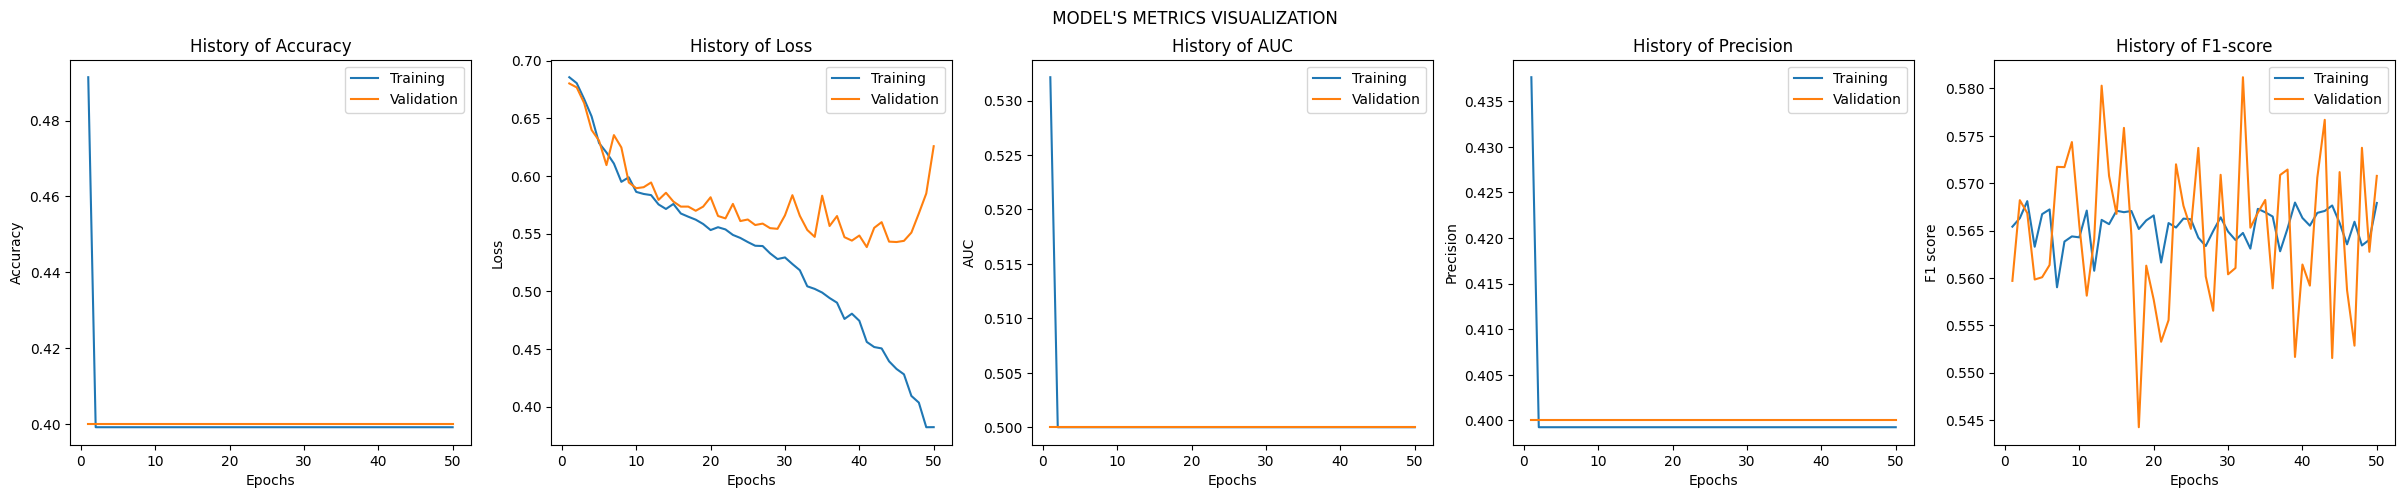

In [174]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Training', 'Validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['Training', 'Validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['Training', 'Validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['Training', 'Validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['Training', 'Validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['get_f1_score'],history.history['val_get_f1_score']
              )
